## Predicting Pulsars
This Kaggle project deals with the astronomical problem of pulsar classification, a task that is seemingly complicated by high amounts of RF interference that comes from space and the relatively weak signals. In this notebook, we will attempt to perform classification on the pulsars. The dataset is stored in the [`data`](./data/) folder.

To start, let's import some required libraries that we will need for any data preparation and importation.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set()

Now we can import our data using pandas, and begin to investigate some of the features and information about the entries.

In [12]:
pulsar_data = pd.read_csv('data/pulsar_stars.csv')

In [13]:
pulsar_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Let's rename our columns so that we can more easily access the features in Python code. We'll define a renaming dictionary.

In [14]:
new_names = ['profile_mean', 'profile_std', 'profile_kurt', 'profile_skew',
            'dmsnr_mean', 'dmsnr_std', 'dmsnr_kurt', 'dmsnr_skew', 'target']
new_names_dict = dict(zip(pulsar_data.columns, new_names))
pulsar_data.rename(columns=new_names_dict, inplace=True)

In [15]:
pulsar_data.head()

,profile_mean,profile_std,profile_kurt,profile_skew,dmsnr_mean,dmsnr_std,dmsnr_kurt,dmsnr_skew,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [16]:
pulsar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
profile_mean    17898 non-null float64
profile_std     17898 non-null float64
profile_kurt    17898 non-null float64
profile_skew    17898 non-null float64
dmsnr_mean      17898 non-null float64
dmsnr_std       17898 non-null float64
dmsnr_kurt      17898 non-null float64
dmsnr_skew      17898 non-null float64
target          17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Now we can segment our data into a training and testing portion using SKLearn. To start, let's start by examining a correlation heatmap to see if we need to remove any columns.

In [17]:
X = pulsar_data.loc[:,:'dmsnr_skew']
y = pulsar_data.target

In [19]:
x_corr = X.corr()

Text(30.453125, 0.5, 'Feature')

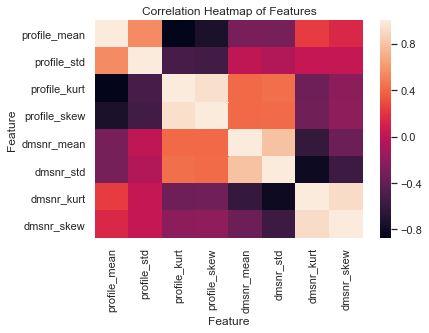

In [23]:
hm = sns.heatmap(x_corr)
hm.set_title('Correlation Heatmap of Features')
hm.set_xlabel('Feature')
hm.set_ylabel('Feature')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [18]:
x_train.head()

,profile_mean,profile_std,profile_kurt,profile_skew,dmsnr_mean,dmsnr_std,dmsnr_kurt,dmsnr_skew
12223,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1919,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2753,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
17220,156.398438,48.865942,-0.215989,-0.171294,17.471572,54.469915,2.958066,7.197842
12110,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128


## Naive Bayes Classification
In this section we will attempt to classify the pulsar stars using a Naive Bayes algorithm. Our data looks roughly normally distributed, so we will start with a Gaussian approach.

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()

In [26]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
gnb.score(x_train, y_train)

0.9443646232439336

In [28]:
gnb.score(x_test, y_test)

0.9467411545623836

That's honestly very high for such a simple algorithm. Makes me wonder a lot of some more complicated machine-learning classification techniques will provide an even higher degree of accuracy in the prediction of pulsar stars. In order to investigate further, let's take a look at the distributions for each feature using Seaborn.

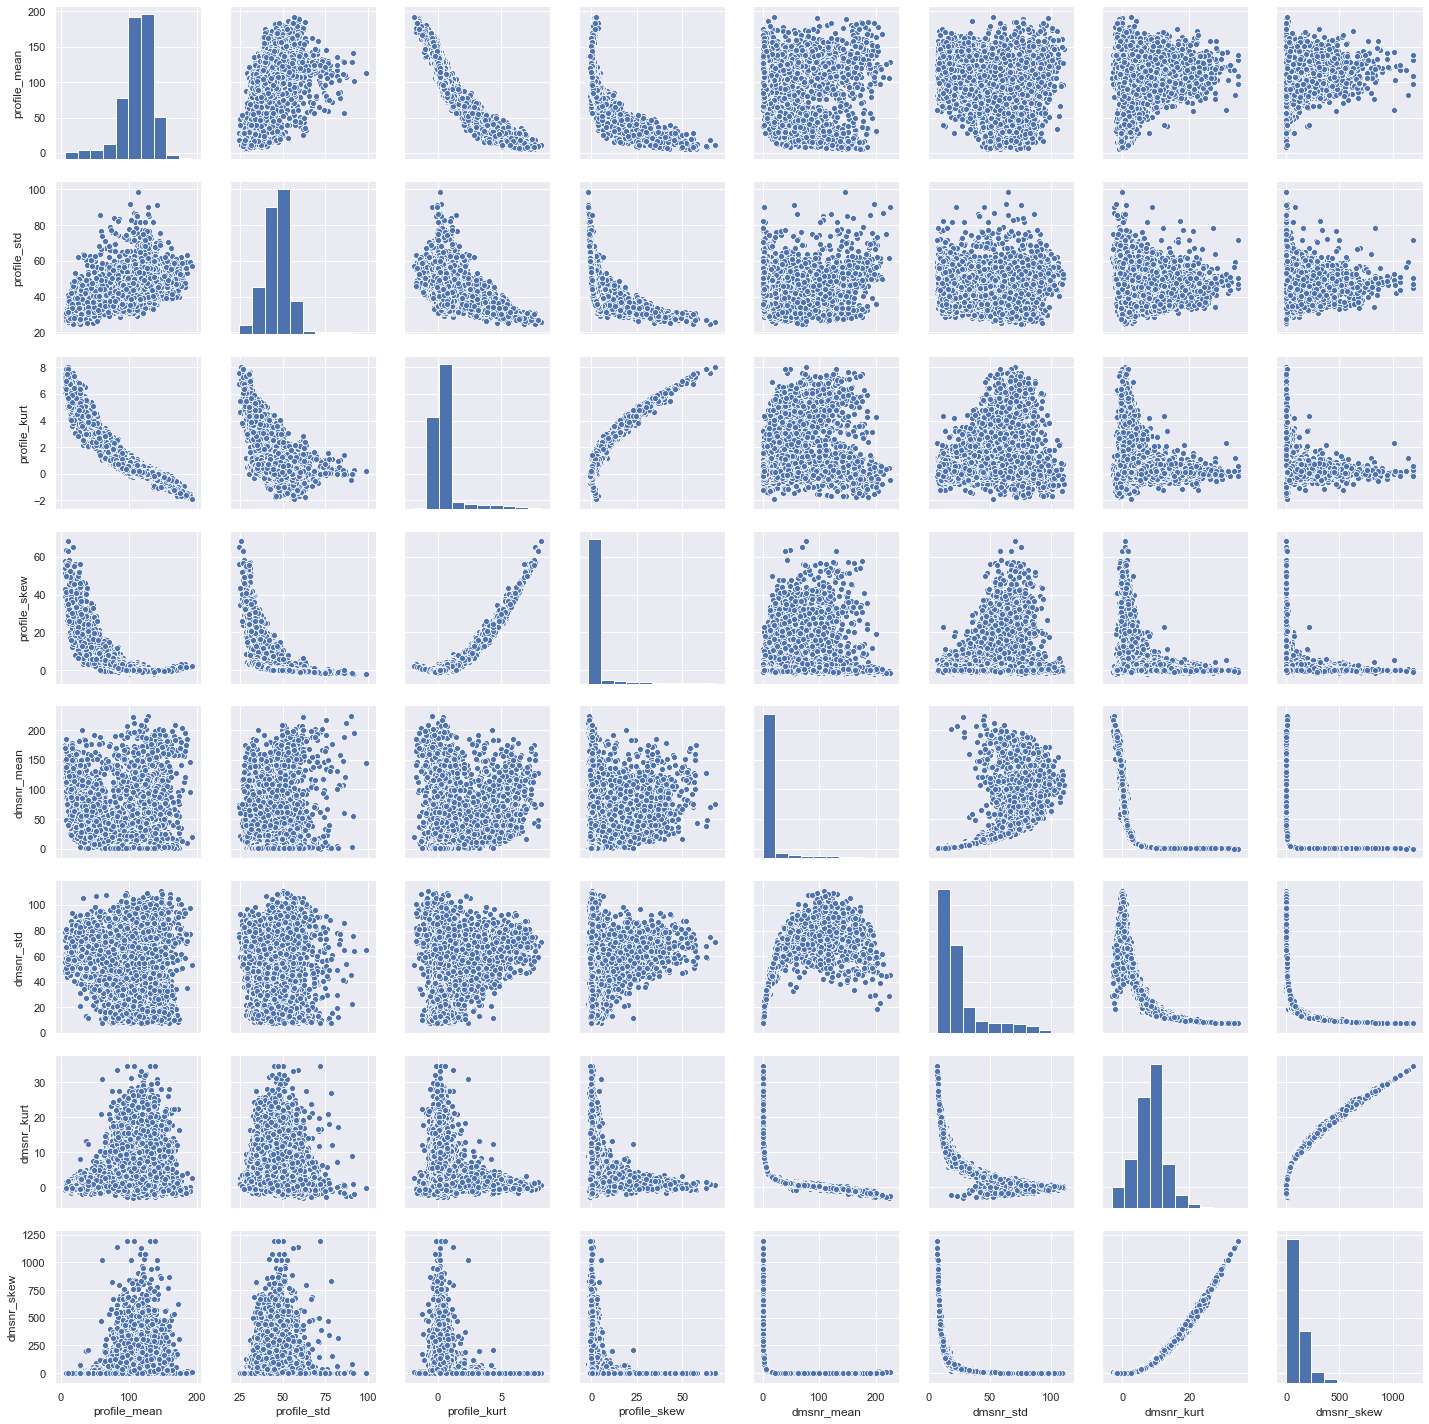

In [33]:
pairplot = sns.pairplot(data=X)

These are some pretty interesting visualizations to have produced. It almost looks as though some of the features are logarithmically related to others.